# Lab 02

This work will cover the usage of convolution and correlation in signal processing and in statistics.

## 1. Convolution and correlation

From the point of view of signal processing convolution and correlation are very similar operations. They are defined as following

Convolution:
$$ (f*g)(y) = \int\limits_{-\infty}^{\infty} f(x)g(y-x)dx$$
Cross-correlation:
$$ (f\star g)(y) = \int\limits_{-\infty}^{\infty} f(x)g(y+x)dx$$

If `g(x)` is symmetric then the convolution and cross-correlation are the same.

Let's create a numpy array with square-shaped signal.

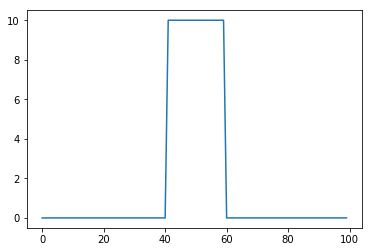

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N = 100 # sample count
startX = 40  
endX = 60
x = np.arange(N)
x = ((x < endX) * (x> startX))*10
plt.plot(x);

Let's create a triangular signal.

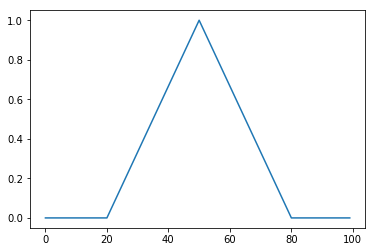

In [5]:
y = np.zeros(100)
heightY = 1.0
startY = 20
endY=80
widthY = (endY-startY)/2.0
for i in range(startY,N/2):
 y[i] =  (i-startY) * (heightY / widthY) 
for i in range(N/2,endY):
 y[i] = 2*heightY - ((i-startY) * (heightY / widthY))
plt.plot(y);

Now let's apply two operations on the inputs and compare results.

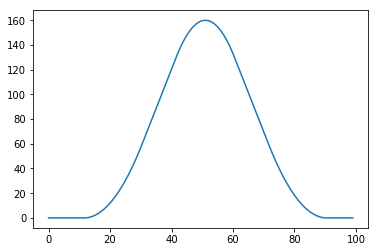

In [6]:
from scipy.signal import convolve
x_conv = convolve(x,y,'same')
plt.plot(x_conv);

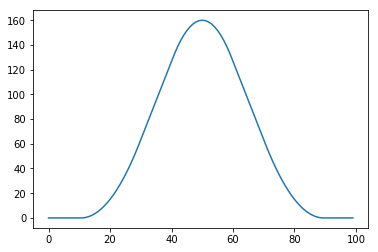

In [7]:
from scipy.signal import correlate
x_corr = correlate(x,y,'same')
plt.plot(x_corr);

As you see, the result of convolution for symmetric kernel is the same as result of correlation.

### Exercise 1
Try these two operations with the non-symetric kernel.

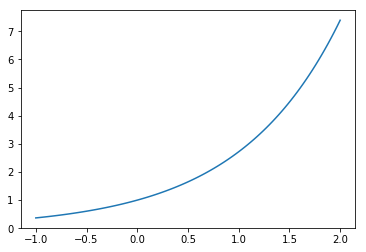

In [8]:
x=np.linspace(-1,2,100)
y=np.exp(x)

plt.plot(x,y)

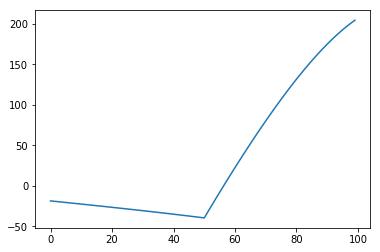

In [9]:
x_conv = convolve(x,y,'same')
plt.plot(x_conv);

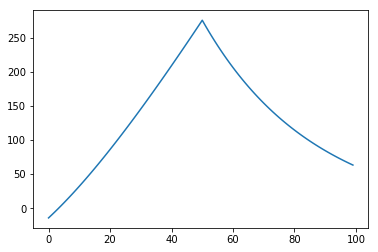

In [10]:
x_corr = correlate(x,y,'same')
plt.plot(x_corr);

## 2. Convolution of distributions
In statistics convolution plays important role.

The distribution of the *sum of two independent variables* is the convolution of the distributions.

I.e. if we consider two independent continuous random variables `X` and `Y` with PDFs `f` and `g` the PDF of their sum (X+Y) will be computed as: 

$$ d(x) = (f * g)(x) $$

We can get an interesting result if we consider the sum of several random variables with identical distributions, i.e. convolution of a distribution with itself several times.
2
For example, let's take a uniform distribution.

In [11]:
%%capture
orig = np.random.uniform(0,10,1200)
h = plt.hist(orig, bins=120, normed=True);
orig = h[0]
t = h[1]
xconv = np.copy(orig)

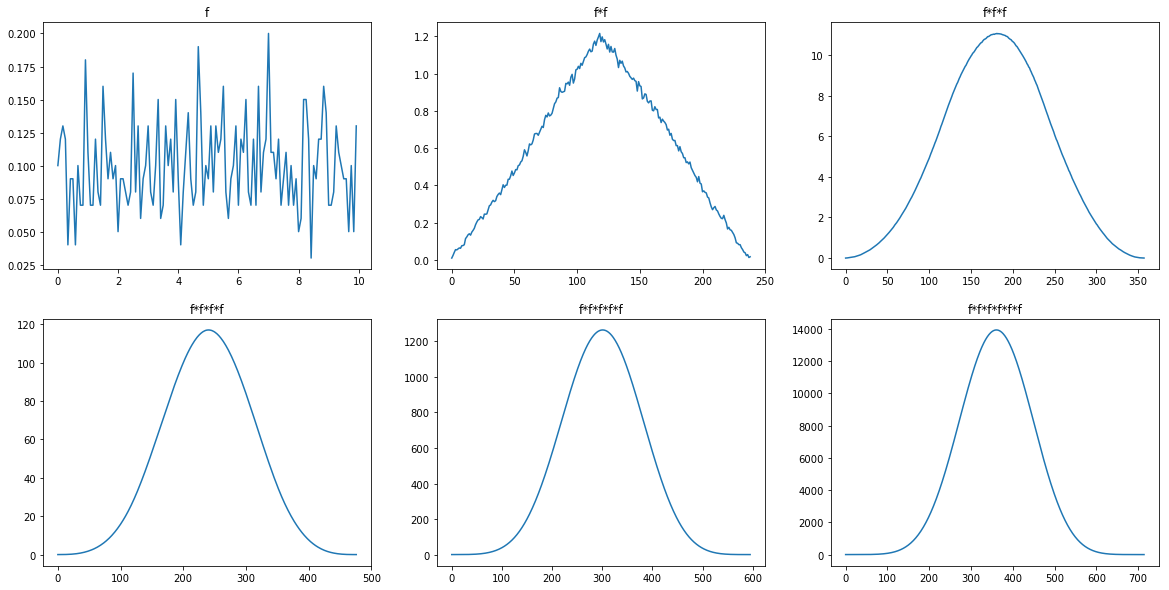

In [12]:
plt.figure(figsize=(20,10))
ax = plt.subplot(2, 3, 1)
ax.set_title("f")
ax.plot(t[:-1], orig);
for i in range(5):
    xconv = convolve(orig, xconv)
    ax = plt.subplot(2, 3, i+2)
    ax.set_title(("f*"*(i+2))[:-1])
    ax.plot(xconv);

This is an illustration of Central Limit Theorem: the distribution of the sum of random variables which are iid (independent identically distributed) has a form of a Gaussian.

## 3. Correlation and covariance

In statistics the linear correlation between two variables X and Y can be measured using Pearson correlation coefficient:

$$ corr(x,y) = \frac{\sum\limits_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt {\sum\limits_{i=1}^n(x_i-\bar{x})^2\sum\limits_{i=1}^n(y_i-\bar{y})^2}}$$

In [24]:
import pandas as pd
data = pd.read_csv('examples/brain_size.csv', sep=';', na_values=".")
data.fillna(data.mean(), inplace=True)
data.corr()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Unnamed: 0,1.000000,-0.334072,-0.241473,-0.371150,0.168519,0.123772,-0.139724
FSIQ,-0.334072,1.000000,0.946639,0.934125,-0.049590,-0.084175,0.357641
VIQ,-0.241473,0.946639,1.000000,0.778135,-0.071988,-0.069610,0.337478
PIQ,-0.371150,0.934125,0.778135,1.000000,0.002461,-0.075462,0.386817
Weight,0.168519,-0.049590,-0.071988,0.002461,1.000000,0.690199,0.501977
Height,0.123772,-0.084175,-0.069610,-0.075462,0.690199,1.000000,0.601308
MRI_Count,-0.139724,0.357641,0.337478,0.386817,0.501977,0.601308,1.000000


The unnormalized version of the correlation coefficient is the measure of joint variability - **covariance**.
$$ cov(x,y) = \frac{1}{n-1}\sum\limits_{i=1}^n(x_i-\bar{x})(y_i-\bar{y}) $$

In [14]:
data.cov()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Unnamed: 0,136.666667,-94.051282,-66.666667,-97.500000,45.052632,5.705457,-1.180682e+05
FSIQ,-94.051282,579.946154,538.376923,505.501282,-27.310391,-7.993097,6.225462e+05
VIQ,-66.666667,538.376923,557.720513,412.939744,-38.878543,-6.482117,5.760814e+05
PIQ,-97.500000,505.501282,412.939744,504.948077,1.264507,-6.686325,6.282894e+05
Weight,45.052632,-27.310391,-38.878543,1.264507,522.971660,62.237382,8.297610e+05
Height,5.705457,-7.993097,-6.482117,-6.686325,62.237382,15.548060,1.713821e+05
MRI_Count,-118068.230769,622546.153846,576081.435897,628289.384615,829761.016194,171382.098817,5.224695e+09


As you can see, the correlation and covariance always have the same sign which shows the tendency in the linear relationship between variables.

Let's now consider more closely the correlation between `Height` and `Weight` of the people from experiments.

In [15]:
import scipy 
scipy.stats.pearsonr(data['Height'], data['Weight'])[0]

0.69019868434268938

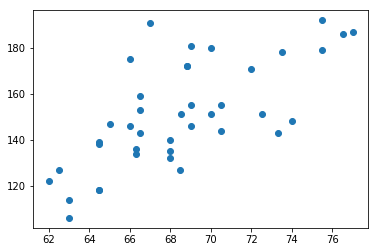

In [16]:
plt.scatter(data['Height'], data['Weight']);

### Exercise 2

Let's compare the difference in the definition of **correlation** from the signal processing point of view and from the point of view of statistics.

1. Compute the correlation from `scipy.signal` package of demeaned signals. Divide by the number of observations - 1.
2. Compute the covariance using `numpy` or any other package. Compare results

In [25]:
# compute demeaned correlation divided by n-1 using scipy.signal
n = len(data)
n

40

In [26]:
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.000000,64.500000,816932
1,2,Male,140,150,124,151.052632,72.500000,1001121
2,3,Male,139,123,150,143.000000,73.300000,1038437
3,4,Male,133,129,128,172.000000,68.800000,965353
4,5,Female,137,132,134,147.000000,65.000000,951545
5,6,Female,99,90,110,146.000000,69.000000,928799
6,7,Female,138,136,131,138.000000,64.500000,991305
7,8,Female,92,90,98,175.000000,66.000000,854258
8,9,Male,89,93,84,134.000000,66.300000,904858
9,10,Male,133,114,147,172.000000,68.800000,955466


In [ ]:
# compute covariance using numpy

### Exercise 3

1. Implement the computation of Pearson correlation coefficient. 
1. Implement calculation of **t-statistics**, and **p-value** for the correlation coefficient. Add p-value to return value of the function.
1. Compare results with `scipy` implementation for `Height` and `Weight`.

In [77]:
from scipy.stats import pearsonr
from itertools import imap

def pearsonr(x, y):
    n = len(x)
    sum_x = float(sum(x))
    sum_y = float(sum(y))
    sum_x_sq = sum(map(lambda x: pow(x, 2), x))
    sum_y_sq = sum(map(lambda x: pow(x, 2), y))
    psum = sum(imap(lambda x, y: x * y, x, y))
    num = psum - (sum_x * sum_y/n)
    den = pow((sum_x_sq - pow(sum_x, 2) / n) * (sum_y_sq - pow(sum_y, 2) / n), 0.5)
    if den == 0: 
        return 0
    return 0.0,0.05

In [78]:
print pearsonr(x,y)

(0.0, 0.05)


In [82]:
np.corrcoef(x, y)

array([[ 1.        ,  0.93500469],
       [ 0.93500469,  1.        ]])

In [ ]:
np.corr